In [1]:
from google.colab import drive

In [2]:
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Loading Data from csv file

In [4]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_loan.csv')

### Examining the data set



In [5]:
train_data.shape

(614, 13)

In [6]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [9]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Handling Missing values

In [10]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
train_data.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [12]:
train_data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Replacing NAN values in gender column with mode

In [13]:
train_data.Gender.fillna('Male',inplace=True)

In [14]:
train_data.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
train_data.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
train_data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [17]:
train_data.Married.mode()

0    Yes
Name: Married, dtype: object

In [18]:
train_data[train_data.Married.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [19]:
train_data.Married.fillna('Yes', inplace=True)

In [20]:
train_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
train_data.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [22]:
train_data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [23]:
train_data.Dependents.mode()

0    0
Name: Dependents, dtype: object

In [24]:
train_data.Dependents.fillna('0', inplace=True)

In [25]:
train_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
train_data.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [27]:
train_data.Self_Employed.mode()

0    No
Name: Self_Employed, dtype: object

In [28]:
train_data.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [29]:
train_data.Self_Employed.fillna('No', inplace=True)

In [30]:
train_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
train_data.LoanAmount.unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [32]:
train_data.LoanAmount.skew()

2.677551679256059

(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

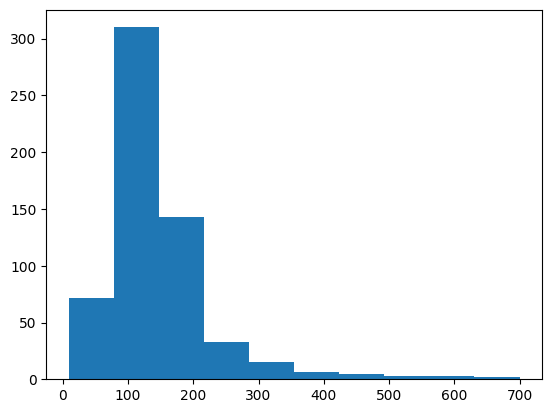

In [33]:
plt.hist(train_data.LoanAmount)

Since data is positively skewed using median to fill mmissing values

In [34]:
train_data.LoanAmount.median()

128.0

In [35]:
train_data.LoanAmount.fillna(train_data.LoanAmount.median(), inplace=True)

In [36]:
train_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [38]:
train_data.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [39]:
train_data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [40]:
train_data.Loan_Amount_Term.skew()

-2.362414124216269

(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 512.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <BarContainer object of 10 artists>)

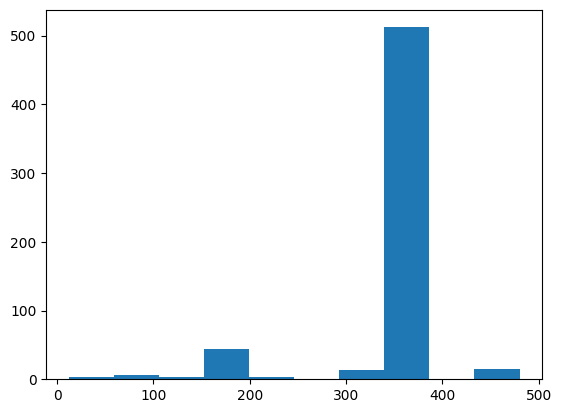

In [41]:
plt.hist(train_data.Loan_Amount_Term)

For negatively skewed data using median to fill nan values

In [42]:
train_data.Loan_Amount_Term.median()

360.0

In [43]:
train_data.Loan_Amount_Term.fillna(train_data.Loan_Amount_Term.median(), inplace=True)

In [44]:
train_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
train_data.Credit_History.unique()

array([ 1.,  0., nan])

In [46]:
train_data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [47]:
train_data.Credit_History.skew()

-1.8823610612186696

In [48]:
train_data.Credit_History.median()

1.0

Since data is negatively skewed using median to fill credit_history

In [49]:
train_data.Credit_History.fillna(train_data.Credit_History.median(), inplace=True)

In [50]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Outlier Handling

In [51]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x7ce9c1182560>,
 'caps': [<matplotlib.lines.Line2D at 0x7ce9c1182aa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ce9c12b3fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ce9c1182fe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ce9c1183280>],
 'means': []}

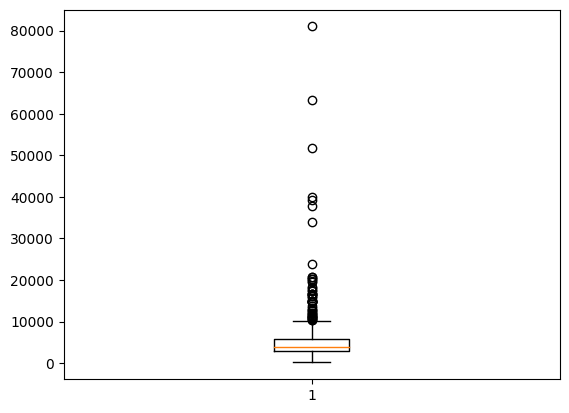

In [52]:
plt.boxplot(train_data.ApplicantIncome)

In [53]:
q1 = train_data.ApplicantIncome.quantile(0.25)
q2 = train_data.ApplicantIncome.quantile(0.5)
q3 = train_data.ApplicantIncome.quantile(0.75)

In [54]:
IQR = q3 - q1

In [55]:
IQR

2917.5

In [56]:
lower = q1 - (1.5 * IQR)
upper = q3 + (1.5 * IQR)

In [57]:
upper

10171.25

In [58]:
lower

-1498.75

In [59]:
train_data.ApplicantIncome.median()

3812.5

In [60]:
q2

3812.5

In [61]:
train_data[(train_data.ApplicantIncome < lower) | (train_data.ApplicantIncome > upper)].index

Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')

Since more number of outliers are present applying capping to ApplicantIncome for outlier handling

In [62]:
#10 Percentile value
lower_threshold = train_data.ApplicantIncome.quantile(0.1)

In [63]:
lower_threshold

2216.1

In [64]:
#90th Percentile value
upper_threshold = train_data.ApplicantIncome.quantile(0.9)

In [65]:
upper_threshold

9459.900000000007

Clipping Values of ApplicantIncome with 10th percentile threshold and 90th percentile as threshold

In [66]:
train_data.ApplicantIncome.clip(lower = lower_threshold, upper= upper_threshold, inplace=True)

In [67]:
train_data.ApplicantIncome

0      5849.0
1      4583.0
2      3000.0
3      2583.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8072.0
612    7583.0
613    4583.0
Name: ApplicantIncome, Length: 614, dtype: float64

In [68]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


<Axes: >

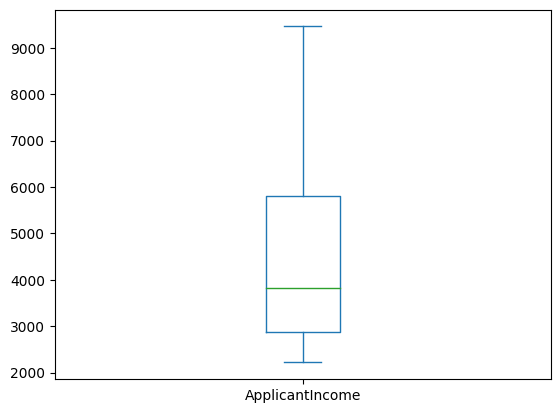

In [69]:
train_data.ApplicantIncome.plot(kind='box')

In [70]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<Axes: >

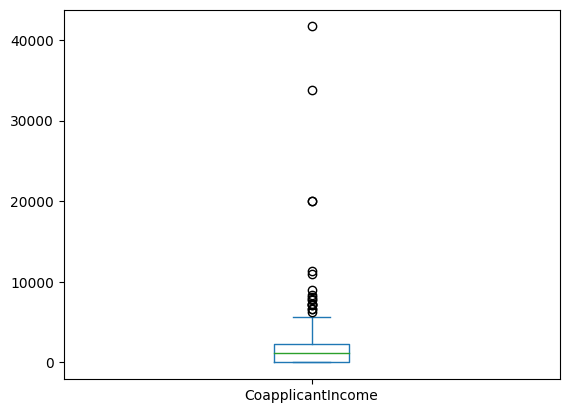

In [71]:
train_data.CoapplicantIncome.plot(kind='box')

Applying Capping method to CoApplicantIncome since many outliers are present

In [72]:
#10th Percentile
coapplicant_income_lower_threshold = train_data.CoapplicantIncome.quantile(0.1)

#90th percentile value as upper threshold
coapplicant_income_upper_threshold = train_data.CoapplicantIncome.quantile(0.9)



In [73]:
coapplicant_income_lower_threshold

0.0

In [74]:
coapplicant_income_upper_threshold

3782.200000000002

In [75]:
train_data.CoapplicantIncome.clip(lower=coapplicant_income_lower_threshold, upper= coapplicant_income_upper_threshold, inplace = True)

<Axes: >

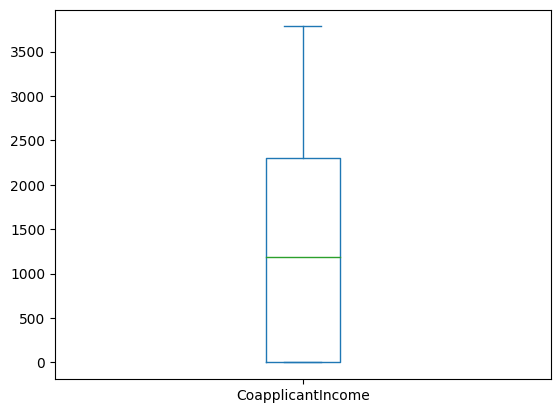

In [76]:
train_data.CoapplicantIncome.plot(kind='box')

<Axes: >

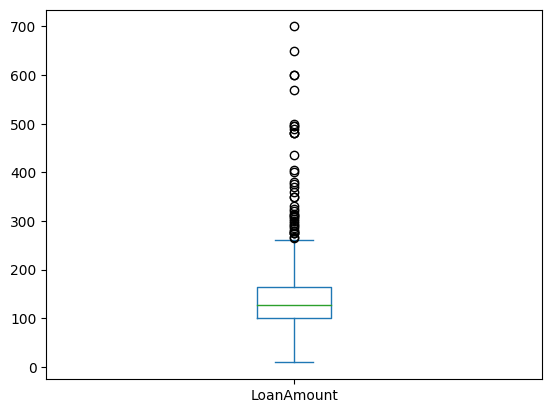

In [77]:
train_data.LoanAmount.plot(kind='box')

Handling the outliers in LoanAmount using capping

In [78]:
#10th Percentile
loan_amount_lower_threshold = train_data.LoanAmount.quantile(0.1)

#90th Percentile
loan_amount_upper_threshold = train_data.LoanAmount.quantile(0.9)

In [79]:
loan_amount_lower_threshold

72.30000000000001

In [80]:
loan_amount_upper_threshold

229.4000000000001

In [81]:
#clipping values in LoanAmount
train_data.LoanAmount.clip(lower = loan_amount_lower_threshold, upper = loan_amount_upper_threshold, inplace = True)

<Axes: >

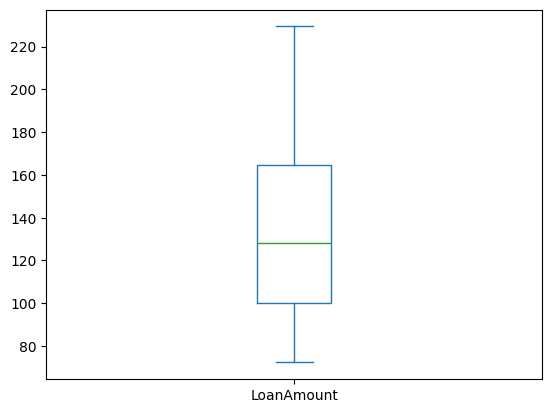

In [82]:
train_data.LoanAmount.plot(kind='box')

<Axes: >

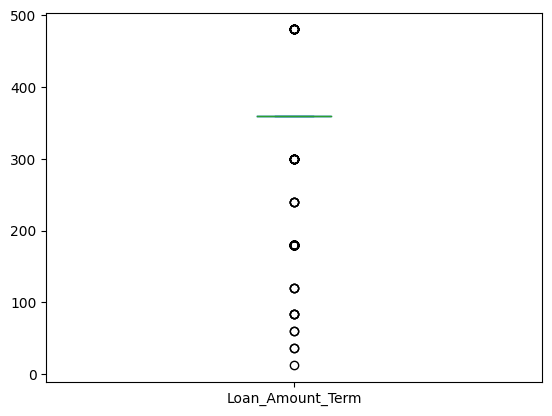

In [83]:
train_data.Loan_Amount_Term.plot(kind='box')

In [84]:
train_data.Loan_Amount_Term.unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [85]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,72.3,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


Leaving the outliers of  Loan_Amount_Term field as it is because they indicate the behaviour of data

In [86]:
train_data.Credit_History.unique()

array([1., 0.])

<Axes: >

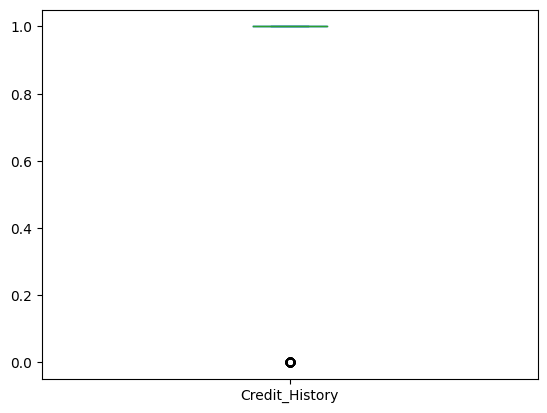

In [87]:
train_data.Credit_History.plot(kind='box')

outlier handling need not be done for Credit_History

#### Encoding

In [88]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [89]:
train_data.Loan_ID.nunique()

614

In [90]:
train_data.Gender.unique()

array(['Male', 'Female'], dtype=object)

Using label encoding on gender field

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
le = LabelEncoder()

In [93]:
train_data.Gender = le.fit_transform(train_data.Gender)

In [94]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000.0,0.0,72.3,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [95]:
train_data.Married.unique()

array(['No', 'Yes'], dtype=object)

Label encoding married column

In [96]:
train_data.Married = le.fit_transform(train_data.Married)

In [97]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,3000.0,0.0,72.3,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [98]:
train_data.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [99]:
train_data.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

Replacing the '+' in the dependents column an converting to int

In [100]:
train_data.Dependents = train_data.Dependents.str.replace('+','')

<ipython-input-100-1246a3f87595>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_data.Dependents = train_data.Dependents.str.replace('+','')


In [101]:
train_data.Dependents.unique()

array(['0', '1', '2', '3'], dtype=object)

In [102]:
train_data.Dependents = train_data.Dependents.astype('int32')

In [103]:
train_data.Dependents.dtype

dtype('int32')

#### Applying label encoding to Loan Status as it is target field

In [104]:
train_data.Loan_Status = le.fit_transform(train_data.Loan_Status)

In [105]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,Graduate,Yes,3000.0,0.0,72.3,360.0,1.0,Urban,1
3,LP001006,1,1,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1


In [106]:
train_data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

#### Dropping Loan_Id as it is unique for all rows

In [107]:
train_data.drop('Loan_ID', axis=1, inplace = True)

In [108]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,1
1,1,1,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,Graduate,Yes,3000.0,0.0,72.3,360.0,1.0,Urban,1
3,1,1,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1


#### One hot encoding the remaining fields

In [109]:
encoded_train_data = pd.get_dummies(train_data)

In [110]:
encoded_train_data.head()

,Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,5849.0,0.0,128.0,360.0,1.0,1,1,0,1,0,0,0,1
1,1,1,1,4583.0,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0
2,1,1,0,3000.0,0.0,72.3,360.0,1.0,1,1,0,0,1,0,0,1
3,1,1,0,2583.0,2358.0,120.0,360.0,1.0,1,0,1,1,0,0,0,1
4,1,0,0,6000.0,0.0,141.0,360.0,1.0,1,1,0,1,0,0,0,1


In [111]:
encoded_train_data.describe()

,Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,4599.164495,1301.116156,136.347557,342.410423,0.855049,0.687296,0.781759,0.218241,0.866450,0.133550,0.291531,0.379479,0.328990
std,0.386497,0.476373,1.009623,2281.072440,1368.959472,47.039245,64.428629,0.352339,0.463973,0.413389,0.413389,0.340446,0.340446,0.454838,0.485653,0.470229
min,0.000000,0.000000,0.000000,2216.100000,0.000000,72.300000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,9459.900000,3782.200000,229.400000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Creating a subset of encoded data to apply scaling to the ApplicatIncome, CoapplicantIncome, Loan Amount, Loan Term fields

In [112]:
columns_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
subset_df = encoded_train_data[columns_to_scale]

In [113]:
subset_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,128.0,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,72.3,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [114]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [115]:
scaled_array = min_max.fit_transform(subset_df)

In [116]:
scaled_array

array([[0.50151854, 0.        , 0.35455124, 0.74358974],
       [0.32674839, 0.39870975, 0.35455124, 0.74358974],
       [0.10821668, 0.        , 0.        , 0.74358974],
       ...,
       [0.80840167, 0.06345513, 1.        , 0.74358974],
       [0.74089566, 0.        , 0.73010821, 0.74358974],
       [0.32674839, 0.        , 0.3863781 , 0.74358974]])

Creating a new data frame with scaled_array and concatinating it with the encoded_train_data and droping the redundant columns

In [117]:
scaled_df = pd.DataFrame(scaled_array, columns = columns_to_scale)

In [118]:
scaled_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.501519,0.000000,0.354551,0.743590
1,0.326748,0.398710,0.354551,0.743590
2,0.108217,0.000000,0.000000,0.743590
3,0.050650,0.623447,0.303628,0.743590
4,0.522364,0.000000,0.437301,0.743590
...,...,...,...,...
609,0.094412,0.000000,0.000000,0.743590
610,0.260899,0.000000,0.000000,0.358974
611,0.808402,0.063455,1.000000,0.743590
612,0.740896,0.000000,0.730108,0.743590


In [119]:
scaled_df = pd.concat([encoded_train_data.drop(columns = columns_to_scale), scaled_df], axis=1)

In [120]:
scaled_df

,Gender,Married,Dependents,Credit_History,Loan_Status,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,1.0,1,1,0,1,0,0,0,1,0.501519,0.000000,0.354551,0.743590
1,1,1,1,1.0,0,1,0,1,0,1,0,0,0.326748,0.398710,0.354551,0.743590
2,1,1,0,1.0,1,1,0,0,1,0,0,1,0.108217,0.000000,0.000000,0.743590
3,1,1,0,1.0,1,0,1,1,0,0,0,1,0.050650,0.623447,0.303628,0.743590
4,1,0,0,1.0,1,1,0,1,0,0,0,1,0.522364,0.000000,0.437301,0.743590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1.0,1,1,0,1,0,1,0,0,0.094412,0.000000,0.000000,0.743590
610,1,1,3,1.0,1,1,0,1,0,1,0,0,0.260899,0.000000,0.000000,0.358974
611,1,1,1,1.0,1,1,0,1,0,0,0,1,0.808402,0.063455,1.000000,0.743590
612,1,1,2,1.0,1,1,0,1,0,0,0,1,0.740896,0.000000,0.730108,0.743590


## Test Data

In [121]:
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_loan.csv')

In [122]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [123]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

### Handling Missing Values

In [124]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [125]:
test_data.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [126]:
test_data.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

Since male is the highest occuring value we replace the nan values in Gender with male

In [127]:
test_data.Gender.fillna('Male', inplace=True)

In [128]:
test_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [129]:
test_data.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [130]:
test_data.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

Replacing the missing values of Dependents column with 0

In [131]:
test_data.Dependents.fillna('0', inplace= True)

In [132]:
test_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [133]:
test_data.Self_Employed.dtype

dtype('O')

In [134]:
test_data.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [135]:
test_data.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

Replcaing nan values of Self_employed with mode

In [136]:
test_data.Self_Employed.fillna('No', inplace=True)

In [137]:
test_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [138]:
test_data.LoanAmount.dtype

dtype('float64')

In [139]:
test_data.LoanAmount.skew()

2.223512207498288

(array([ 46., 160., 100.,  37.,   8.,   6.,   2.,   1.,   1.,   1.]),
 array([ 28. ,  80.2, 132.4, 184.6, 236.8, 289. , 341.2, 393.4, 445.6,
        497.8, 550. ]),
 <BarContainer object of 10 artists>)

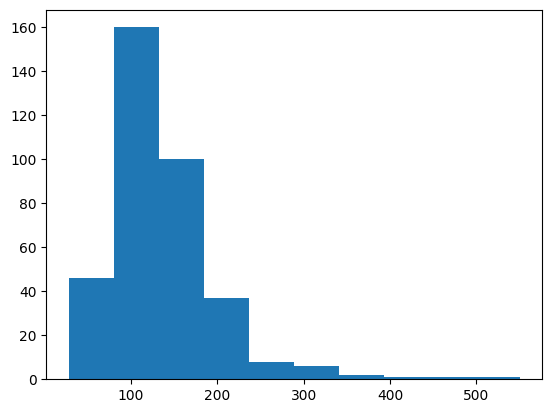

In [140]:
plt.hist(test_data.LoanAmount)

Since data is skewed positively using median to replace the missing values

In [141]:
test_data.LoanAmount.median()

125.0

In [142]:
test_data.LoanAmount.fillna(test_data.LoanAmount.median(), inplace=True)

In [143]:
test_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [144]:
test_data.Loan_Amount_Term.dtype

dtype('float64')

In [145]:
test_data.Loan_Amount_Term.unique()

array([360., 240., 180.,  nan,  60., 480.,  84.,  12., 300., 350.,  36.,
       120.,   6.])

In [146]:
test_data.Loan_Amount_Term.value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

Replcaing the missing values of Loan_Amount_Term with mode

In [147]:
test_data.Loan_Amount_Term.fillna(360.0, inplace=True)

In [148]:
test_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [149]:
test_data.Credit_History.unique()

array([ 1., nan,  0.])

In [150]:
test_data.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

Repalcing nan values of Credit History with 1.0, since it is the highest occuring value

In [151]:
test_data.Credit_History.fillna(1.0, inplace=True)

In [152]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Outlier handling

In [153]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

<Axes: >

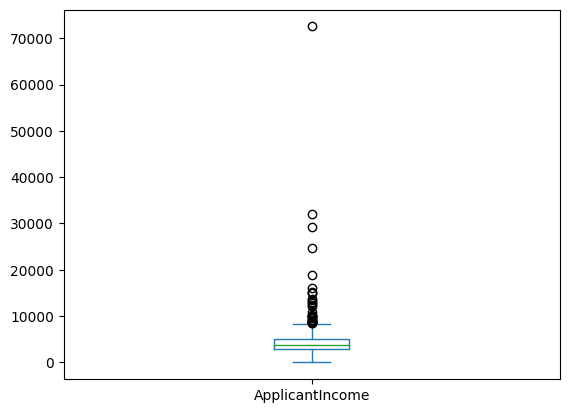

In [154]:
test_data.ApplicantIncome.plot(kind='box')

Since there are many outliers capping the outliers with lower threshold of 10 percentile and upper threshold of 90th percentile

In [155]:
#10th Percentile
test_applicant_income_lower = test_data.ApplicantIncome.quantile(0.1)
#90th Percentile
test_applicant_income_upper = test_data.ApplicantIncome.quantile(0.9)

In [156]:
test_applicant_income_lower

2229.0

In [157]:
test_applicant_income_upper

7882.400000000001

In [158]:
test_data.ApplicantIncome.clip(lower=test_applicant_income_lower, upper=test_applicant_income_upper, inplace=True )

<Axes: >

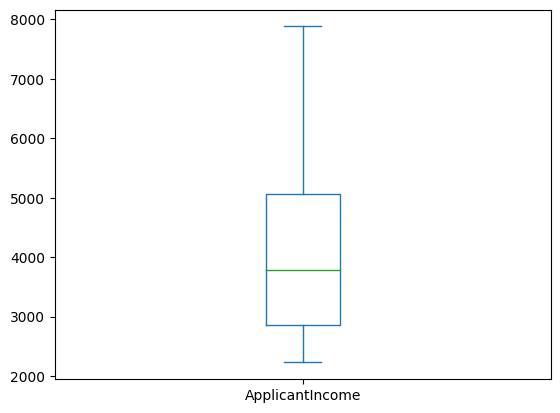

In [159]:
test_data.ApplicantIncome.plot(kind='box')

<Axes: >

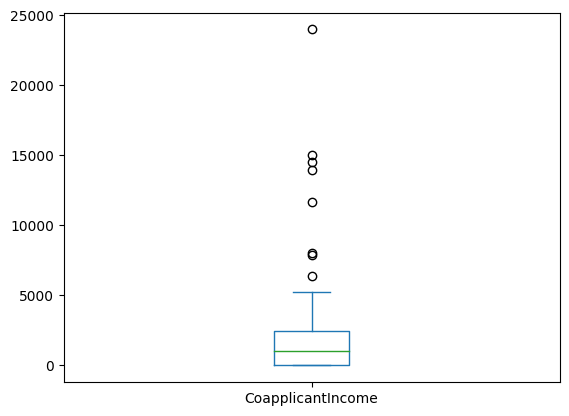

In [160]:
test_data.CoapplicantIncome.plot(kind='box')

In [161]:
#10th Percentile
test_coapplicant_income_lower = test_data.CoapplicantIncome.quantile(0.1)
#90th Percentile
test_coapplicant_income_upper = test_data.CoapplicantIncome.quantile(0.9)

In [162]:
test_coapplicant_income_lower

0.0

In [163]:
test_coapplicant_income_upper

3782.6000000000013

In [164]:
test_data.CoapplicantIncome.clip(lower=test_coapplicant_income_lower, upper=test_coapplicant_income_upper, inplace=True )

<Axes: >

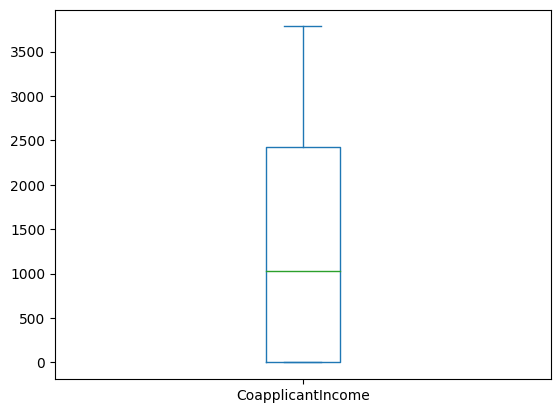

In [165]:
test_data.CoapplicantIncome.plot(kind='box')

<Axes: >

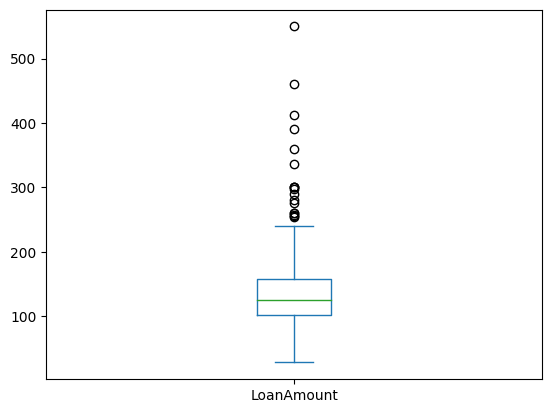

In [166]:
test_data.LoanAmount.plot(kind='box')

In [168]:
#10th Percentile
test_loanamount_lower = test_data.LoanAmount.quantile(0.1)
#90th Percentile
test_loanamount_upper = test_data.LoanAmount.quantile(0.9)

In [169]:
test_loanamount_lower

77.6

In [170]:
test_loanamount_upper

194.00000000000017

In [171]:
test_data.LoanAmount.clip(lower=test_loanamount_lower, upper=test_loanamount_upper, inplace=True )

<Axes: >

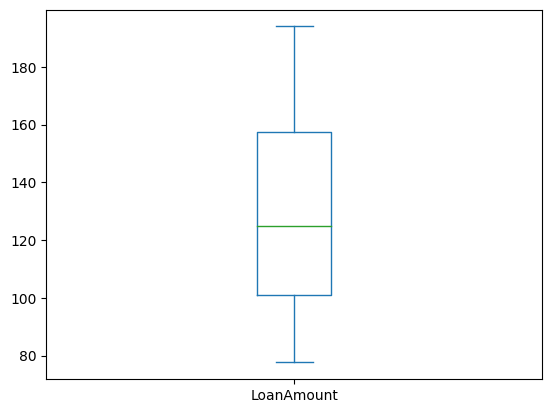

In [172]:
test_data.LoanAmount.plot(kind='box')

In [173]:
test_data.Loan_Amount_Term.unique()

array([360., 240., 180.,  60., 480.,  84.,  12., 300., 350.,  36., 120.,
         6.])

In [174]:
test_data.Loan_Amount_Term.value_counts()

360.0    317
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

<Axes: >

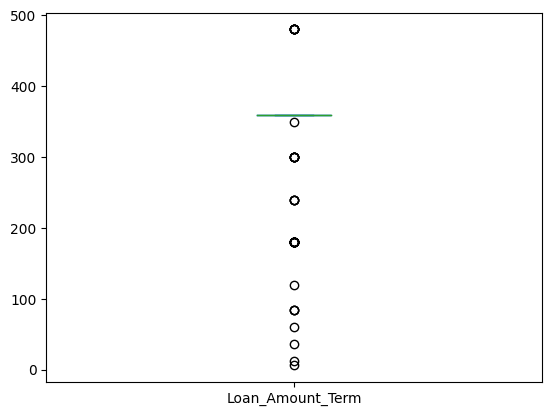

In [175]:
test_data.Loan_Amount_Term.plot(kind='box')

Ignoring Loan_Amount_Term from outlier handling

<Axes: >

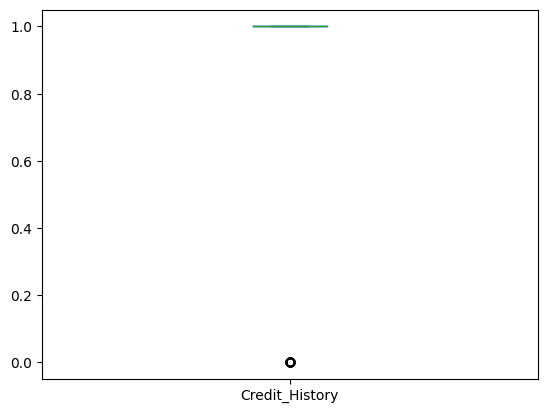

In [176]:
test_data.Credit_History.plot(kind='box')

### Encoding

In [177]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [178]:
test_data.Loan_ID.nunique()

367

In [179]:
test_data.shape

(367, 12)

Since all values are unique dropping the Loan_ID column

In [180]:
test_data.drop('Loan_ID',axis=1, inplace=True)

In [181]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000.0,1800.0,194.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban


Label encoding gender field

In [183]:
test_data.Gender = le.fit_transform(test_data.Gender)

In [184]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,Yes,0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,1,Yes,1,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,1,Yes,2,Graduate,No,5000.0,1800.0,194.0,360.0,1.0,Urban
3,1,Yes,2,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,1,No,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban


Label encoding married column

In [185]:
test_data.Married = le.fit_transform(test_data.Married)

In [186]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,1,1,1,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,1,1,2,Graduate,No,5000.0,1800.0,194.0,360.0,1.0,Urban
3,1,1,2,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,1,0,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban


In [188]:
test_data.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

replacing the + in Dependents field

In [189]:
test_data.Dependents = test_data.Dependents.str.replace('+','')

<ipython-input-189-96478ba512e4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_data.Dependents = test_data.Dependents.str.replace('+','')


In [190]:
test_data.Dependents = test_data.Dependents.astype('int32')

In [191]:
test_data.Dependents.unique()

array([0, 1, 2, 3], dtype=int32)

Onehot encoding the remaining fields

In [192]:
encoded_test_data = pd.get_dummies(test_data)

In [193]:
encoded_test_data

,Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,5720.0,0.0,110.0,360.0,1.0,1,0,1,0,0,0,1
1,1,1,1,3076.0,1500.0,126.0,360.0,1.0,1,0,1,0,0,0,1
2,1,1,2,5000.0,1800.0,194.0,360.0,1.0,1,0,1,0,0,0,1
3,1,1,2,2340.0,2546.0,100.0,360.0,1.0,1,0,1,0,0,0,1
4,1,0,0,3276.0,0.0,78.0,360.0,1.0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,4009.0,1777.0,113.0,360.0,1.0,0,1,0,1,0,0,1
363,1,1,0,4158.0,709.0,115.0,360.0,1.0,1,0,1,0,0,0,1
364,1,0,0,3250.0,1993.0,126.0,360.0,1.0,1,0,1,0,0,1,0
365,1,1,0,5000.0,2393.0,158.0,360.0,1.0,1,0,1,0,1,0,0


In [194]:
encoded_test_data.describe()

,Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.809264,0.634877,0.806540,4249.680654,1330.613624,130.545504,342.822888,0.839237,0.771117,0.228883,0.899183,0.100817,0.302452,0.316076,0.381471
std,0.393417,0.482122,1.065177,1783.436365,1395.807506,37.087583,64.658402,0.367814,0.420687,0.420687,0.301498,0.301498,0.459947,0.465578,0.486411
min,0.000000,0.000000,0.000000,2229.000000,0.000000,77.600000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2864.000000,0.000000,101.000000,360.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,7882.400000,3782.600000,194.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scaling

In [195]:
encoded_test_data.dtypes

Gender                       int64
Married                      int64
Dependents                   int32
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

Creating a subset of encoded data to apply scaling to the ApplicatIncome, CoapplicantIncome, Loan Amount, Loan Term fields

In [196]:
test_columns_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
subset_test_df = encoded_test_data[test_columns_to_scale]

In [197]:
subset_test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5720.0,0.0,110.0,360.0
1,3076.0,1500.0,126.0,360.0
2,5000.0,1800.0,194.0,360.0
3,2340.0,2546.0,100.0,360.0
4,3276.0,0.0,78.0,360.0


In [198]:
scaled_test_array = min_max.fit_transform(subset_test_df)

In [199]:
scaled_test_array

array([[0.61750451, 0.        , 0.27835052, 0.74683544],
       [0.14982135, 0.39655264, 0.41580756, 0.74683544],
       [0.49014752, 0.47586316, 1.        , 0.74683544],
       ...,
       [0.18059929, 0.52688627, 0.41580756, 0.74683544],
       [0.49014752, 0.63263364, 0.69072165, 0.74683544],
       [1.        , 0.        , 0.17525773, 0.36708861]])

In [200]:
scaled_test_df = pd.DataFrame(scaled_test_array, columns = test_columns_to_scale)

In [201]:
scaled_test_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.617505,0.000000,0.278351,0.746835
1,0.149821,0.396553,0.415808,0.746835
2,0.490148,0.475863,1.000000,0.746835
3,0.019634,0.673082,0.192440,0.746835
4,0.185198,0.000000,0.003436,0.746835
...,...,...,...,...
362,0.314855,0.469783,0.304124,0.746835
363,0.341211,0.187437,0.321306,0.746835
364,0.180599,0.526886,0.415808,0.746835
365,0.490148,0.632634,0.690722,0.746835


In [202]:
scaled_test_df = pd.concat([encoded_test_data.drop(columns = test_columns_to_scale), scaled_test_df], axis=1)

In [203]:
scaled_test_df

,Gender,Married,Dependents,Credit_History,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,1,0,1.0,1,0,1,0,0,0,1,0.617505,0.000000,0.278351,0.746835
1,1,1,1,1.0,1,0,1,0,0,0,1,0.149821,0.396553,0.415808,0.746835
2,1,1,2,1.0,1,0,1,0,0,0,1,0.490148,0.475863,1.000000,0.746835
3,1,1,2,1.0,1,0,1,0,0,0,1,0.019634,0.673082,0.192440,0.746835
4,1,0,0,1.0,0,1,1,0,0,0,1,0.185198,0.000000,0.003436,0.746835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1.0,0,1,0,1,0,0,1,0.314855,0.469783,0.304124,0.746835
363,1,1,0,1.0,1,0,1,0,0,0,1,0.341211,0.187437,0.321306,0.746835
364,1,0,0,1.0,1,0,1,0,0,1,0,0.180599,0.526886,0.415808,0.746835
365,1,1,0,1.0,1,0,1,0,1,0,0,0.490148,0.632634,0.690722,0.746835
